# Problem Statement

***Prepare solution to build ticketing system there by using json file as your primary datasource (Text corpus with other metadata in it).*** 
    
    Step 1: Group data into five categories namely 
        Banking services, 
        loans, 
        Fraudalent reporting, 
        Card, 
        others.
        

    Step 2: From step 1 create labeled dataset and utilize it to train supervised model like
        logistic regression, decision tree or random forest.
===========================================================================================================================

    * Above excercise should follow these steps *
        1.Load Data
        2.Text Preprocessing
        3.EDA
        4.Feature Extraction
        5.Topic Modelling (Unsupervised)
        6.Model building using Supervised learning
        7.Model Training and evaluation
        8.Inference


**Script:** NLP_assignment_Ranveer <br>

**Purpose:** Prepare solution to build ticketing system  <br>
**Author:** Sagar Bhamburkar  <br>
**Peer review:** Ranveer, Karan, Shriti  <br>
**Version:** SB1  <br>
**Date of last update:** 22Dec22  <br>

### Import libraries

In [2]:
import pandas as pd
import numpy as np 
import string, re, nltk, spacy, json
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

nltk.download('punkt')
import en_core_web_sm
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sagar_bhamburkar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\sagar_bhamburkar\Anaconda3\lib\site-packages\spacy\util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


### Feature Engineering

In [3]:
#import json file
with open("Client_data.json") as jsonFile:
    data = json.load(jsonFile)
    df = pd.json_normalize(data)

In [4]:
df.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [5]:
df.columns

Index(['_index', '_type', '_id', '_score', '_source.tags', '_source.zip_code',
       '_source.complaint_id', '_source.issue', '_source.date_received',
       '_source.state', '_source.consumer_disputed', '_source.product',
       '_source.company_response', '_source.company', '_source.submitted_via',
       '_source.date_sent_to_company', '_source.company_public_response',
       '_source.sub_product', '_source.timely',
       '_source.complaint_what_happened', '_source.sub_issue',
       '_source.consumer_consent_provided'],
      dtype='object')

In [6]:
df.shape

(78313, 22)

In [7]:
df.isnull().sum()

_index                                   0
_type                                    0
_id                                      0
_score                                   0
_source.tags                         67413
_source.zip_code                      6757
_source.complaint_id                     0
_source.issue                            0
_source.date_received                    0
_source.state                         1991
_source.consumer_disputed                0
_source.product                          0
_source.company_response                 0
_source.company                          0
_source.submitted_via                    0
_source.date_sent_to_company             0
_source.company_public_response      78309
_source.sub_product                  10571
_source.timely                           0
_source.complaint_what_happened          0
_source.sub_issue                    46297
_source.consumer_consent_provided     1008
dtype: int64

In [8]:
#fetch only required three columns according to problem statement 
df = df[['_source.product','_source.sub_product','_source.complaint_what_happened']]
df.head()

,_source.product,_source.sub_product,_source.complaint_what_happened
0,Debt collection,Credit card debt,
1,Debt collection,Credit card debt,Good morning my name is XXXX XXXX and I apprec...
2,Credit card or prepaid card,General-purpose credit card or charge card,I upgraded my XXXX XXXX card in XX/XX/2018 and...
3,Mortgage,Conventional home mortgage,
4,Credit card or prepaid card,General-purpose credit card or charge card,


In [9]:
#rename columns
df = df.rename(columns={
    '_source.product':'product',
    '_source.sub_product':'sub_product',
    '_source.complaint_what_happened':'complaint_list'
    })

df.head()

,product,sub_product,complaint_list
0,Debt collection,Credit card debt,
1,Debt collection,Credit card debt,Good morning my name is XXXX XXXX and I apprec...
2,Credit card or prepaid card,General-purpose credit card or charge card,I upgraded my XXXX XXXX card in XX/XX/2018 and...
3,Mortgage,Conventional home mortgage,
4,Credit card or prepaid card,General-purpose credit card or charge card,


In [10]:
#we can make one column of product and sub product
df['product_subproduct'] = df['product'] + '_'+ df['sub_product']
df.head()

,product,sub_product,complaint_list,product_subproduct
0,Debt collection,Credit card debt,,Debt collection_Credit card debt
1,Debt collection,Credit card debt,Good morning my name is XXXX XXXX and I apprec...,Debt collection_Credit card debt
2,Credit card or prepaid card,General-purpose credit card or charge card,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card_General-purpose cr...
3,Mortgage,Conventional home mortgage,,Mortgage_Conventional home mortgage
4,Credit card or prepaid card,General-purpose credit card or charge card,,Credit card or prepaid card_General-purpose cr...


In [11]:
#remove product and sub product columns
df = df.drop(['product','sub_product'], axis=1)
df.head()

,complaint_list,product_subproduct
0,,Debt collection_Credit card debt
1,Good morning my name is XXXX XXXX and I apprec...,Debt collection_Credit card debt
2,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Credit card or prepaid card_General-purpose cr...
3,,Mortgage_Conventional home mortgage
4,,Credit card or prepaid card_General-purpose cr...


In [12]:
df.isnull().sum()

complaint_list            0
product_subproduct    10571
dtype: int64

In [13]:
#zero null values for complaint list, but as we can see in row 3 and 4 there are some empty string
df.iloc[3]

complaint_list                                           
product_subproduct    Mortgage_Conventional home mortgage
Name: 3, dtype: object

In [14]:
df['complaint_list'][3]

''

In [15]:
#there are some empty values in complaint_list
len(df[df['complaint_list']==''])

57241

In [16]:
#deal with empty values by assinging with nan values
df[df['complaint_list']==''] = np.nan
df['complaint_list'].isnull().sum()

57241

In [17]:
# as missing values are more so we can go ahead with drop method
# df = df['complaint_list'].dropna()
df = df[~df['complaint_list'].isnull()]
df['complaint_list'].isnull().sum()

0

Now our data is ready for NLP's pipeline

### Text Data Pre-Processing

In [19]:
def pre_processing(text):
    text = text.lower() #lower case
    re_punc= re.compile('[%s]' % re.escape(string.punctuation))
    text = re_punc.sub('',text) #remove punctuation
    text = re.sub('\S*\d\S*s*', '', text)
    return text.strip()

In [20]:
df['complaint_list'] = df['complaint_list'].apply(lambda i: pre_processing(i))

In [ ]:
# df['token_complaint'] = df['complaint_list'].apply(word_tokenize)

In [21]:
df.head()

,complaint_list,product_subproduct
1,good morning my name is xxxx xxxx and i apprec...,Debt collection_Credit card debt
2,i upgraded my xxxx xxxx card in and was told ...,Credit card or prepaid card_General-purpose cr...
10,chase card was reported on however fraudulent...,"Credit reporting, credit repair services, or o..."
11,on while trying to book a xxxx xxxx ticket ...,"Credit reporting, credit repair services, or o..."
14,my grand son give me check for i deposit it i...,Checking or savings account_Checking account


In [ ]:
# lemmatizer = WordNetLemmatizer()
# df['token_complaint'] = df['token_complaint'].astype(str)
# df['lemma_complaint'] = ''.join([lemmatizer.lemmatize(w) for w in df['token_complaint']])

In [22]:
nlp=spacy.load('en_core_web_sm')
stopwords = nlp.Defaults.stop_words
def lemma_processing(text):
    doc = nlp(text)
    lemma = [token.lemma_ for token in doc if not token.text in set(stopwords)]
    return  ' '.join(lemma)

C:\Users\sagar_bhamburkar\Anaconda3\lib\site-packages\spacy\util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [23]:
import time
time_start1 = round(time.time())

df['complaint_lemma'] = df['complaint_list'].apply(lambda i: lemma_processing(i))

time_end1 = round(time.time())
time_elapsed1 = time_end1 - time_start1
print(time_elapsed1/60,' minutes...')
#it takes more time

32.85  minutes...


In [24]:
df.head()

,complaint_list,product_subproduct,complaint_lemma
1,good morning my name is xxxx xxxx and i apprec...,Debt collection_Credit card debt,good morning xxxx xxxx appreciate help stop ch...
2,i upgraded my xxxx xxxx card in and was told ...,Credit card or prepaid card_General-purpose cr...,upgrade xxxx xxxx card tell agent upgrade an...
10,chase card was reported on however fraudulent...,"Credit reporting, credit repair services, or o...",chase card report fraudulent application sub...
11,on while trying to book a xxxx xxxx ticket ...,"Credit reporting, credit repair services, or o...",try book xxxx xxxx ticket come offer a...
14,my grand son give me check for i deposit it i...,Checking or savings account_Checking account,grand son check deposit chase account fund c...


In [25]:
df['complaint_lemma'].head(12)

1     good morning xxxx xxxx appreciate help stop ch...
2     upgrade xxxx xxxx card   tell agent upgrade an...
10    chase card report   fraudulent application sub...
11      try book xxxx   xxxx   ticket come offer   a...
14    grand son check   deposit chase account fund c...
15                                       remove inquiry
17    notice jp morgan chase restrict account debit ...
20    summer month experience decline income employm...
21    xxxx     payment online retailer chase quick p...
23    chase credit card incorrectly report datum cre...
24                    mishandle account chase auto xxxx
26    reach xxxx time attempt fraudulent inquiry rem...
Name: complaint_lemma, dtype: object

In [33]:
#POS
nlp=spacy.load('en_core_web_sm')

def pos_tag(text):
    doc = nlp(text)
    sentences = [token.text for token in doc if token.tag_ == 'NN']
    return ' '.join(sentences)

C:\Users\sagar_bhamburkar\Anaconda3\lib\site-packages\spacy\util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.2.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.3.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [34]:
import time

time_start1 = round(time.time())
df['complaint_lemma'] = df['complaint_lemma'].astype(str)

df['complaint_POS_removed'] = df['complaint_lemma'].apply(lambda i: pos_tag(i))
time_end1 = round(time.time())
time_elapsed1 = time_end1 - time_start1
print(time_elapsed1/60,' minutes...')
df.head()

8.05  minutes...


,complaint_list,product_subproduct,complaint_lemma,cleaned_complaint,complaint_POS_removed
1,good morning my name is xxxx xxxx and i apprec...,Debt collection_Credit card debt,good morning xxxx xxxx appreciate help stop ch...,morninghelpchasedebtverificationstatementbankv...,morning help chase debt verification statement...
2,i upgraded my xxxx xxxx card in and was told ...,Credit card or prepaid card_General-purpose cr...,upgrade xxxx xxxx card tell agent upgrade an...,xxxxcardagentupgradeanniversarydatechangeagent...,xxxx card agent upgrade anniversary date chang...
10,chase card was reported on however fraudulent...,"Credit reporting, credit repair services, or o...",chase card report fraudulent application sub...,reportapplicationsubmitidentityconsentservicee...,report application submit identity consent ser...
11,on while trying to book a xxxx xxxx ticket ...,"Credit reporting, credit repair services, or o...",try book xxxx xxxx ticket come offer a...,xxxxticketticketcardinformationminutenotifyscr...,xxxx ticket ticket card information minute not...
14,my grand son give me check for i deposit it i...,Checking or savings account_Checking account,grand son check deposit chase account fund c...,sonaccountpaymoneysonmoneymoneytimeverifycheck...,son account pay money son money money time ver...


In [35]:
df['complaint_POS_removed'].tail(10)

78294    concert ticket xxxx know risk lot question tic...
78295    chase term condition price term card month acc...
78296    file dispute credit card company visa purchase...
78297    balance transfer apr rut godsend help debt int...
78301    husband bank check rent car insurance ask need...
78303    card customer decade solicitation credit card ...
78309    credit card provider claim purchase protection...
78310    pay risk consumer year banking tell deal merch...
78311    credit credit card freedom problem balance tra...
78312    year account order line credit account payment...
Name: complaint_POS_removed, dtype: object

In [36]:
df[['complaint_list','complaint_POS_removed']].loc[78301]

complaint_list           my husband passed away chase bank put check on...
complaint_POS_removed    husband bank check rent car insurance ask need...
Name: 78301, dtype: object

In [37]:
#removing pron
df['cleaned_complaint'] = df['complaint_POS_removed'].str.replace('-PRON-', '')
df = df.drop(['complaint_POS_removed'], axis=1)

In [38]:
df[['complaint_list','cleaned_complaint']].loc[78301]

complaint_list       my husband passed away chase bank put check on...
cleaned_complaint    husband bank check rent car insurance ask need...
Name: 78301, dtype: object

In [39]:
df['cleaned_complaint'] = df['cleaned_complaint'].str.replace('xxxx','')
df.head()

,complaint_list,product_subproduct,complaint_lemma,cleaned_complaint
1,good morning my name is xxxx xxxx and i apprec...,Debt collection_Credit card debt,good morning xxxx xxxx appreciate help stop ch...,morning help chase debt verification statement...
2,i upgraded my xxxx xxxx card in and was told ...,Credit card or prepaid card_General-purpose cr...,upgrade xxxx xxxx card tell agent upgrade an...,card agent upgrade anniversary date change ag...
10,chase card was reported on however fraudulent...,"Credit reporting, credit repair services, or o...",chase card report fraudulent application sub...,report application submit identity consent ser...
11,on while trying to book a xxxx xxxx ticket ...,"Credit reporting, credit repair services, or o...",try book xxxx xxxx ticket come offer a...,ticket ticket card information minute notify ...
14,my grand son give me check for i deposit it i...,Checking or savings account_Checking account,grand son check deposit chase account fund c...,son account pay money son money money time ver...


### TF-IDF vector

In [46]:
vectorizer = TfidfVectorizer(stop_words='english', min_df=2, max_df=0.9)  
tfidf_vectors = vectorizer.fit_transform(df['cleaned_complaint'])

In [48]:
tfidf_vectors.A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### NMF

In [49]:
from sklearn.decomposition import NMF

In [51]:
# num_topics = 5

nmf_model = NMF(n_components=5, random_state=40)

w1 = nmf_model.fit_transform(tfidf_vectors)
h1 = nmf_model.components_

C:\Users\sagar_bhamburkar\Anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [59]:
#top 15 
num_words = 15
vocab = np.array(vectorizer.get_feature_names())

top_words = lambda x: [vocab[i] for i in np.argsort(x)[:-num_words-1:-1]]
topic_words = ([top_words(x) for x in h1])
topics = [' '.join(x) for x in topic_words]

In [60]:
vocab

array(['aa', 'aarp', 'abandon', ..., 'zombie', 'zone', 'zoom'],
      dtype='<U24')

In [61]:
topics

['account check money deposit fund bank chase day branch transfer number business transaction customer time',
 'credit card report inquiry account score chase company information debt remove limit application letter year',
 'payment balance pay month statement fee day time chase auto date credit mortgage year account',
 'charge card dispute fee chase transaction purchase merchant refund service fraud time claim statement email',
 'loan mortgage chase home modification property year letter document rate time request foreclosure sale information']

In [63]:
#for proper arrangement
#to create best topic for each complaint

colnames = ['Topic' + str(i) for i in range(nmf_model.n_components)]
docnames = ['Doc' + str(i) for i in range(len(df['cleaned_complaint']))]
df_topic = pd.DataFrame(np.round(w1,2), columns=colnames, index=docnames)
significant_topic = np.argmax(df_topic.values, axis=1)
df_topic['dominant_topic'] = significant_topic

In [65]:
df_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.01,0.01,0.01,0.01,0.03,4
Doc1,0.01,0.01,0.00,0.01,0.01,0
Doc2,0.00,0.05,0.00,0.00,0.00,1
Doc3,0.02,0.07,0.00,0.00,0.02,1
Doc4,0.05,0.00,0.00,0.00,0.01,0
...,...,...,...,...,...,...
Doc21067,0.00,0.07,0.02,0.06,0.00,1
Doc21068,0.01,0.01,0.00,0.03,0.02,3
Doc21069,0.02,0.02,0.00,0.02,0.01,0
Doc21070,0.00,0.05,0.11,0.03,0.00,2


In [66]:
df['Topic'] = significant_topic

In [67]:
df.head()

,complaint_list,product_subproduct,complaint_lemma,cleaned_complaint,Topic
1,good morning my name is xxxx xxxx and i apprec...,Debt collection_Credit card debt,good morning xxxx xxxx appreciate help stop ch...,morning help chase debt verification statement...,4
2,i upgraded my xxxx xxxx card in and was told ...,Credit card or prepaid card_General-purpose cr...,upgrade xxxx xxxx card tell agent upgrade an...,card agent upgrade anniversary date change ag...,0
10,chase card was reported on however fraudulent...,"Credit reporting, credit repair services, or o...",chase card report fraudulent application sub...,report application submit identity consent ser...,1
11,on while trying to book a xxxx xxxx ticket ...,"Credit reporting, credit repair services, or o...",try book xxxx xxxx ticket come offer a...,ticket ticket card information minute notify ...,1
14,my grand son give me check for i deposit it i...,Checking or savings account_Checking account,grand son check deposit chase account fund c...,son account pay money son money money time ver...,0


In [68]:
df['Topic'].value_counts()

0    5597
1    4994
3    4581
4    3605
2    2295
Name: Topic, dtype: int64

In [70]:
#assign complaint's name with topics
topics = { 
    0: 'Banking services', 
    1: 'Credit Card / Prepaid Card', 
    2: 'Others', 
    3: 'Theft/Dispute Reporting', 
    4: 'Mortgage/Loan'
}

df['Topic'] = df['Topic'].map(topics)

In [71]:
df.head()

,complaint_list,product_subproduct,complaint_lemma,cleaned_complaint,Topic
1,good morning my name is xxxx xxxx and i apprec...,Debt collection_Credit card debt,good morning xxxx xxxx appreciate help stop ch...,morning help chase debt verification statement...,Mortgage/Loan
2,i upgraded my xxxx xxxx card in and was told ...,Credit card or prepaid card_General-purpose cr...,upgrade xxxx xxxx card tell agent upgrade an...,card agent upgrade anniversary date change ag...,Banking services
10,chase card was reported on however fraudulent...,"Credit reporting, credit repair services, or o...",chase card report fraudulent application sub...,report application submit identity consent ser...,Credit Card / Prepaid Card
11,on while trying to book a xxxx xxxx ticket ...,"Credit reporting, credit repair services, or o...",try book xxxx xxxx ticket come offer a...,ticket ticket card information minute notify ...,Credit Card / Prepaid Card
14,my grand son give me check for i deposit it i...,Checking or savings account_Checking account,grand son check deposit chase account fund c...,son account pay money son money money time ver...,Banking services


In [72]:
df['Topic'].value_counts()

Banking services              5597
Credit Card / Prepaid Card    4994
Theft/Dispute Reporting       4581
Mortgage/Loan                 3605
Others                        2295
Name: Topic, dtype: int64

### Training phase

In [75]:
train_data = df[['complaint_list', 'Topic']]

In [76]:
train_data

,complaint_list,Topic
1,good morning my name is xxxx xxxx and i apprec...,Mortgage/Loan
2,i upgraded my xxxx xxxx card in and was told ...,Banking services
10,chase card was reported on however fraudulent...,Credit Card / Prepaid Card
11,on while trying to book a xxxx xxxx ticket ...,Credit Card / Prepaid Card
14,my grand son give me check for i deposit it i...,Banking services
...,...,...
78303,after being a chase card customer for well ove...,Credit Card / Prepaid Card
78309,on wednesday xxxxxxxx i called chas my xxxx xx...,Theft/Dispute Reporting
78310,i am not familiar with xxxx pay and did not un...,Banking services
78311,i have had flawless credit for yrs ive had ch...,Others


In [77]:
#reverse topic mapping
reverse_mapping = {
    'Banking services':0, 
    'Credit Card / Prepaid Card':1, 
    'Others':2, 
    'Theft/Dispute Reporting':3, 
    'Mortgage/Loan':4
}

train_data['Topic'] = train_data['Topic'].map(reverse_mapping)
train_data.head()

C:\Users\SAGAR_~1\AppData\Local\Temp/ipykernel_47384/703802989.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Topic'] = train_data['Topic'].map(reverse_mapping)


,complaint_list,Topic
1,good morning my name is xxxx xxxx and i apprec...,4
2,i upgraded my xxxx xxxx card in and was told ...,0
10,chase card was reported on however fraudulent...,1
11,on while trying to book a xxxx xxxx ticket ...,1
14,my grand son give me check for i deposit it i...,0


In [82]:
#x-y split
X = train_data['complaint_list']
y = train_data['Topic']

In [83]:
# get vector count
count_vec = CountVectorizer()
X_vect = count_vec.fit_transform(X)

In [87]:
# fit transform word vector to TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
X_tfidf = tfidf.fit_transform(X_vect)

In [88]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_tfidf,y,test_size=0.25,random_state=40)

### Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
model = RandomForestClassifier(n_estimators=450, random_state=40)

In [91]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=450, random_state=40)

In [94]:
print('Score : {}'.format(model.score(X_test, y_test)*100))

Score : 81.98557327258922


In [95]:
y_pred = model.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[1293   63    3   32    6]
 [  50 1058    1  104   12]
 [  94  104  267   44   78]
 [ 123   70    1  956   15]
 [  79   56    9    5  745]]


In [99]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1397
           1       0.78      0.86      0.82      1225
           2       0.95      0.45      0.62       587
           3       0.84      0.82      0.83      1165
           4       0.87      0.83      0.85       894

    accuracy                           0.82      5268
   macro avg       0.85      0.78      0.79      5268
weighted avg       0.83      0.82      0.81      5268



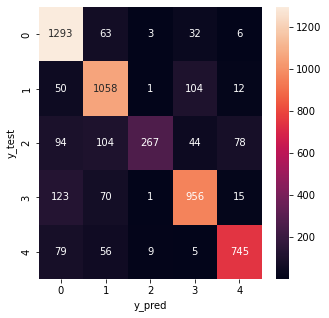

In [107]:
import seaborn as sns
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linecolor='red', fmt='.0f', ax=ax)
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

### Hyper-parameter tunning

In [106]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(random_state=40, n_jobs=-1, oob_score=True)
time_start1 = round(time.time())

parameters = {
    'n_estimators': [50,100,200,500,700],
    'max_depth': [10,20,30,40,None],
    'min_samples_leaf' : [5,10,15,20,30]
}

grid_s_cv_rf = GridSearchCV(rf,parameters)
grid_s_cv_rf.fit(X_train,y_train.values.ravel())

#oob score
print('OOB score : ',grid_s_cv_rf.best_estimator_.oob_score_)

#best hyperparameter
print('Best Score : ', grid_s_cv_rf.best_score_)
print('Best Hyper parameters : ', grid_s_cv_rf.best_params_)

time_end1 = round(time.time())
time_elapsed1 = time_end1 - time_start1
print(time_elapsed1/60,' minutes...')

OOB score :  0.7980258162490509
Best Score :  0.7978359476051081
Best Hyper parameters :  {'max_depth': None, 'min_samples_leaf': 5, 'n_estimators': 700}


### Thank You!